In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [17]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.5)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.5)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.32139788632985977

Parameter estimates for the model with few features:
[-0.         -0.25561356 -0.          0.00220588]

R² for the model with many features:
0.30824960733096385

Parameter estimates for the model with many features:
[ 0.00000000e+00 -2.30499742e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.91693116e-04
 -2.45208452e-06  4.37132245e+00]


In [18]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.3188164216780198
0.30273308882996786


0.563089493671649 1
0.5312352331355782 2
0.4781445089581413 3
0.4038148555303914 4
0.30824960733096385 5
0.1914467410568792 6
0.053407814340633464 7
0.02683413474903795 8
0.026834134561415365 9


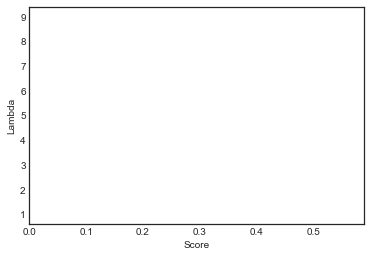

In [50]:
sns.set_style('white')
# run model for many alphas
plt.xlabel('Score')
plt.ylabel('Lambda')

for lamd in range(1, 10, 1):
    lassBig = linear_model.Lasso(alpha=(lamd/10))
    lassBig.fit(X_train2, Y_train)
    print(lassBig.score(X_train2, Y_train), lamd)
    plt.plot(lassBig.score(X_train2, Y_train), lamd)
plt.show()

In [37]:
lassBig.score(X_train2, Y_train)

0.004659164520248615

In [10]:
#do ridge regression
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.5738739164402877
[ 1.36988466e-02 -7.57859433e-01 -3.25298557e-04]
0.5739464289613285

Parameter Estimates for the same predictors for the small modeland large model:
[[0.014 -0.002]
 [-0.758 -0.757]
 [-0.000 0.048]]


In [11]:
print(ridgeregr.score(X_test, Y_test))

print(ridgeregrBig.score(X_test2, Y_test))

0.5631088763076704
0.5631804323931104


0.5739686014514367 1
0.5736928869929727 101
0.5730033566871264 201
0.5719286999217659 301
0.5705175985824678 401
0.5688127922942767 501
0.5668517780729023 601
0.5646675159613794 701
0.5622890347262011 801
0.5597419468511012 901


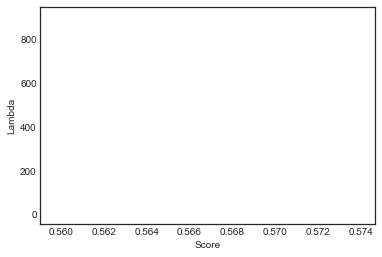

In [55]:
# run model for many alphas
plt.xlabel('Score')
plt.ylabel('Lambda')

for lamd in range(1, 1000, 100):
    ridgeregrBig = linear_model.Ridge(alpha=lamd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    print(ridgeregrBig.score(X_train2, Y_train), lamd)
    plt.plot(ridgeregrBig.score(X_train2, Y_train), lamd)
plt.show()